# K-Nerest Neighbor (in Regression)
* Formula of the distance calculation
>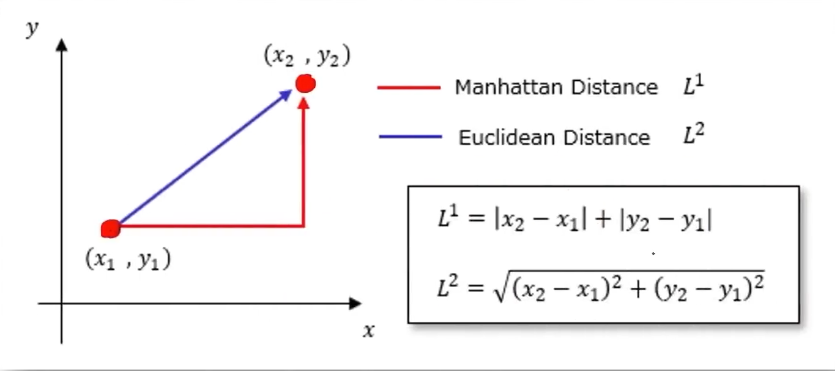

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('../../../dataset/Salary_Data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.drop(columns=['Gender','Education Level','Job Title'],inplace=True)
df.rename(columns={'Years of Experience':'Experience'},inplace=True)
df.head()

,Age,Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [4]:
df.isnull().sum()

Age           2
Experience    3
Salary        5
dtype: int64

In [5]:
for i in df.columns:
    df.fillna({i:df[i].mean()},inplace=True)
df.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

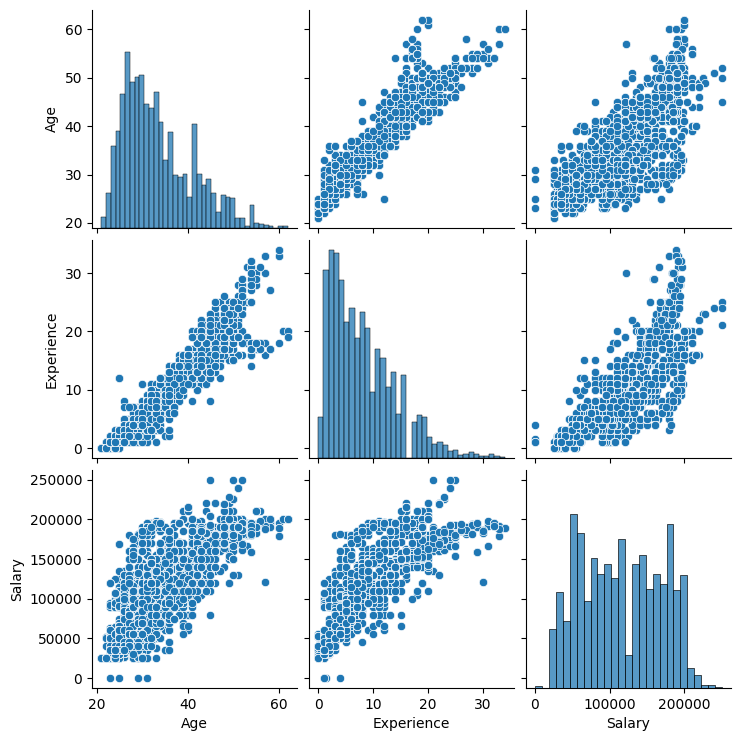

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
x = df.drop(columns='Salary')
y = df['Salary']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
knn = KNeighborsRegressor(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=24)

In [10]:
knn.score(x_train,y_train),knn.score(x_test,y_test)

(0.8422131572864318, 0.8260569870221246)

In [11]:
for i in range(1,31):
    knn1 = KNeighborsRegressor(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train),knn1.score(x_test,y_test))


1 0.7186473253175845 0.6796310474435272
2 0.7895256385964387 0.7646719487038008
3 0.8135861585935922 0.7881121684198383
4 0.8296158793635928 0.8029999771045114
5 0.8297061631553257 0.805448302787243
6 0.832161329057536 0.807129437691371
7 0.8360830233740161 0.8123339370217526
8 0.8365663719121402 0.8122769085010398
9 0.8343861875082687 0.8084886887200815
10 0.835124668102588 0.8091862611794831
11 0.8375790625397987 0.8127315391737175
12 0.8382865738224671 0.8145109908282915
13 0.8390373177563932 0.8160381190027615
14 0.8391600464254114 0.8161151271500335
15 0.8404368426881549 0.8191072237633117
16 0.8403333703961882 0.8185862646396476
17 0.8405884269656769 0.8190096945339742
18 0.8410670702422358 0.8205446857573724
19 0.8421904056674953 0.8224352186526313
20 0.8420373037368877 0.8237144491804221
21 0.8427393261467359 0.8251488659418751
22 0.842683369197652 0.8257871997710186
23 0.841884651408183 0.8258573658843057
24 0.8422131572864318 0.8260569870221246
25 0.8422900726257493 0.8249910

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

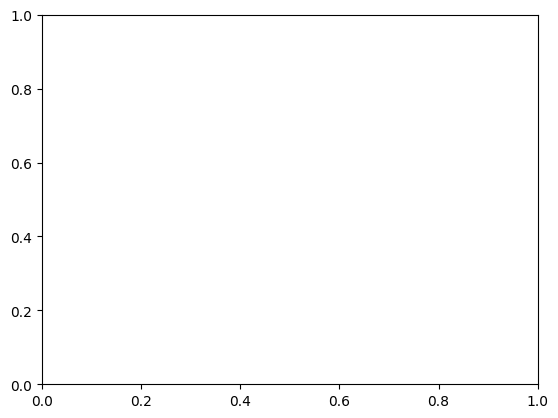

In [13]:
# at here the y is contains floating point numbers so, we have converted y axis data into numpy integer64 format
plot_decision_regions(x.to_numpy(),y.to_numpy().astype(np.int64),clf=knn)
plt.show()

### Checking the accuracy using standardized dataset

In [ ]:
ss = StandardScaler()
ss_x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
ss_x

,Age,Experience
0,-0.212909,-0.510911
1,-0.738331,-0.841097
2,1.494713,1.140018
3,0.312513,-0.180725
4,2.414201,1.965483
...,...,...
6699,2.020135,1.965483
6700,-0.212909,-0.841097
6701,-0.475620,-0.676004
6702,1.626068,0.974925


In [ ]:
ss_x_train, ss_x_test, ss_y_train, ss_y_test = train_test_split(ss_x, y, test_size=0.25, random_state=42)

In [ ]:
ss_knn = KNeighborsRegressor(n_neighbors=24)
ss_knn.fit(ss_x_train,ss_y_train)
ss_knn.score(ss_x_train,ss_y_train),ss_knn.score(ss_x_test,ss_y_test)

(0.841532425594387, 0.8236479372107434)

In [ ]:
for i in range(1,31):
    ss_knn1 = KNeighborsRegressor(n_neighbors=i)
    ss_knn1.fit(ss_x_train,ss_y_train)
    print(i,ss_knn1.score(ss_x_train,ss_y_train),ss_knn1.score(ss_x_test,ss_y_test))

1 0.7272906378546455 0.6807203668331473
2 0.7988382358552854 0.7662241763203574
3 0.8113396665728647 0.7819286841187643
4 0.8245731738868999 0.792771087717716
5 0.8277058554833867 0.7982653596389575
6 0.8286915755899552 0.8019521945684499
7 0.8318770275554271 0.8049823946453223
8 0.8357609435015071 0.8091263349318075
9 0.8342293615993981 0.8071525149212296
10 0.8361369193574175 0.8079059635969834
11 0.8348557375925649 0.8077013918089174
12 0.8365806006083467 0.8103272312877521
13 0.8387274897938357 0.8134977441372991
14 0.8398694894563657 0.8153551263524769
15 0.8391594908013484 0.8152522262487603
16 0.8395323238717188 0.8157975212106828
17 0.8393487511346756 0.8155171624285968
18 0.8400415209841074 0.81682100840925
19 0.8403905335016946 0.8191659505365498
20 0.8416814846576406 0.8210903398439802
21 0.8420314365329006 0.8226640406848437
22 0.8421876642081618 0.8233940370090925
23 0.8419741276560976 0.8240667816000204
24 0.841532425594387 0.8236479372107434
25 0.8416983142147832 0.82364

In [ ]:
# at here the y is contains floating point numbers so, we have converted y axis data into numpy integer64 format
plot_decision_regions(ss_x.to_numpy(),y.to_numpy().astype(np.int64),clf=ss_knn)
plt.show()